<a href="https://colab.research.google.com/github/Luke-687/Portfolio/blob/main/Navigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [671]:
import random
import matplotlib.pyplot as plt

c=5

def createScene():
  XYColor = []
  for i in range (0,c):
    for j in range (0,c):
      color = ""
      rand = random.randint(1,4)
      if(rand==1):
        color="red"
      elif(rand==3 or rand==2 or rand==4):
        color="green"
      XYColor.append([j,i,color])

  x = []
  y = []
  color = []
  for i in range (0,len(XYColor)):
    x.append(XYColor[i][0])
    y.append(XYColor[i][1])
    color.append(XYColor[i][2])
  return x, y, color

In [672]:
def reward(color):
  if(color=="red"):
    return -20
  else:
    return 5

In [673]:
states = []
actions = {}
transitions = {}

#define states in 10x10 grid
for i in range (0,c):
  for j in range (0,c):
    states.append((j,i))

#define actions (0,1)
for s in states:
  actions.setdefault(s, []).extend([0,1])

#define transitions
xS, yS, colorScene = createScene()
for s in states:
  x=s[0]
  y=s[1]

  if(x+1<c):
    color = colorScene[x+1+y*5]
    r = reward(color)
    transitions.setdefault((s, 0), []).append([(x+1,y), 1.00, r])
  else:
    color = colorScene[x+y*5]
    r = reward(color)
    transitions.setdefault((s, 0), []).append([(x,y), 1.00, r])
  if(y+1<c):
    color = colorScene[x+y*5+5]
    r = reward(color)
    transitions.setdefault((s, 1), []).append([(x,y+1), 1.00, r])
  else:
    color = colorScene[x+y*5]
    r = reward(color)
    transitions.setdefault((s, 1), []).append([(x,y), 1.00, r])

In [674]:
#train model
def optimizer(states, actions, transitions, episodes):
  d = 0
  policy = {s: None for s in states}
  V = {s: 0 for s in states}

  for i in range(0,episodes):
    for s in states:
      aValues = {}
      for a in actions[s]:
        sum = 0
        for (s_next, prob, reward) in transitions[(s, a)]:
          sum += prob * (reward + 0.9 * V[s_next])
        aValues[a] = sum
      maxAct = max(aValues, key = aValues.get)

      policy[s] = maxAct
      V[s] = aValues[maxAct]
      d = max(d, abs(aValues[maxAct]-V[s]))

    if(d<=0.0001):
      break
  return policy

In [675]:
policy = optimizer(states, actions, transitions, 1000)

In [676]:
currentX = 0
currentY = 0
xPos = [0]
yPos = [0]
while (currentX<c and currentY<c):
  move = policy[(currentX,currentY)]
  if(move==0):
    currentX+=1
    xPos.append(currentX)
    yPos.append(currentY)
  else:
    currentY+=1
    xPos.append(currentX)
    yPos.append(currentY)

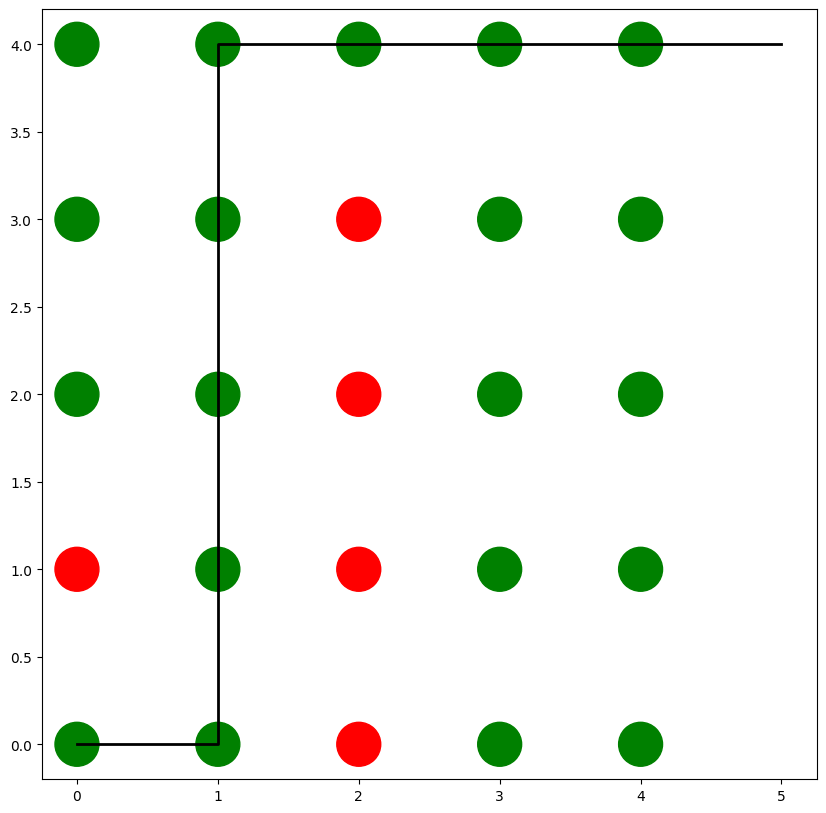

In [677]:
plt.figure(figsize=(10, 10))
plt.scatter(xS, yS, c=colorScene, s=1000)
plt.plot(xPos, yPos, linewidth=2, color = "black")